<a href="https://colab.research.google.com/github/sgu960323/machine-learning/blob/master/OCR/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

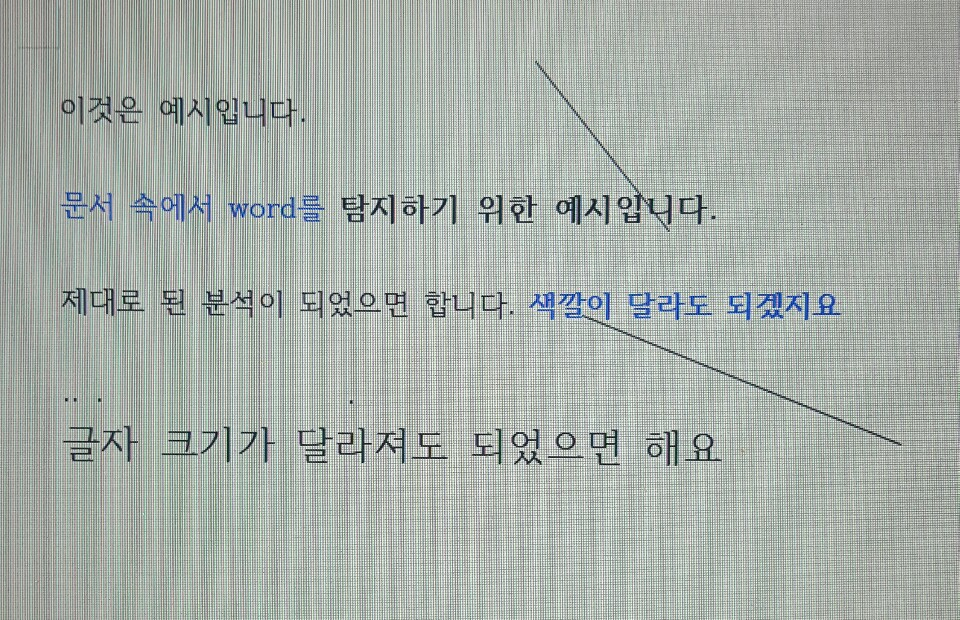

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
img_path="/detect_text.jpg"
img=cv2.imread(img_path, flags=1)
cv2_imshow(img)

In [2]:
print(img.shape)

(620, 960, 3)


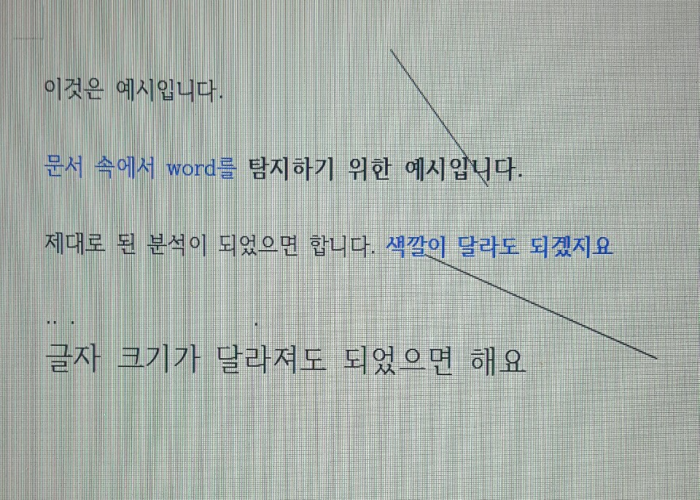

In [3]:
resize_img=cv2.resize(img, (700, 500), interpolation=cv2.INTER_AREA)
cv2_imshow(resize_img)

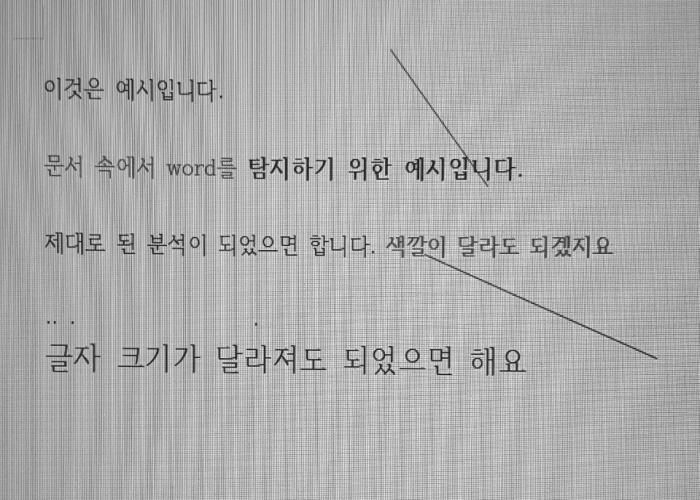

(500, 700)


In [4]:
gray_img=cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)
print(gray_img.shape)

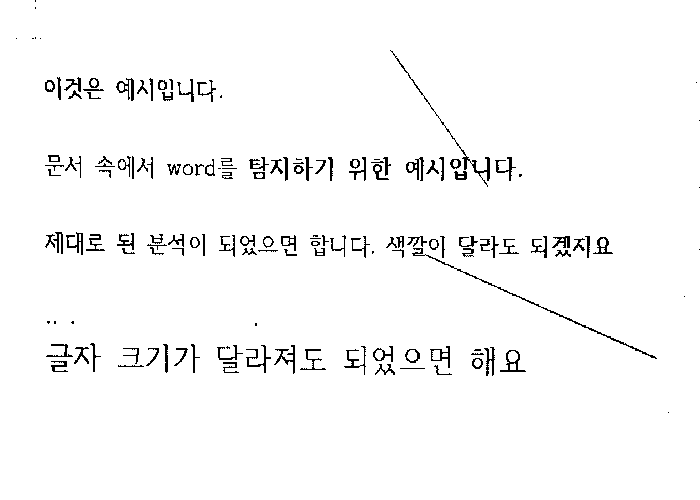

In [5]:
_,thres_img=cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY)
cv2_imshow(thres_img)

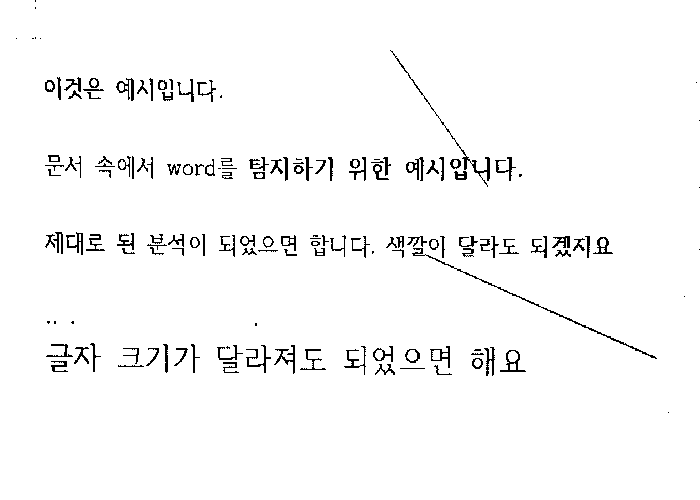

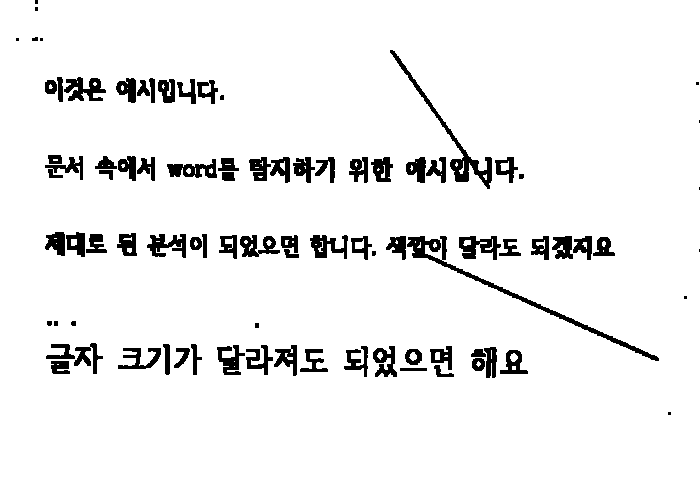

In [6]:
cv2_imshow(thres_img)
kernel = np.ones((2, 2), np.uint8)
erode_img = cv2.erode(thres_img, kernel, iterations = 2)
cv2_imshow(erode_img)

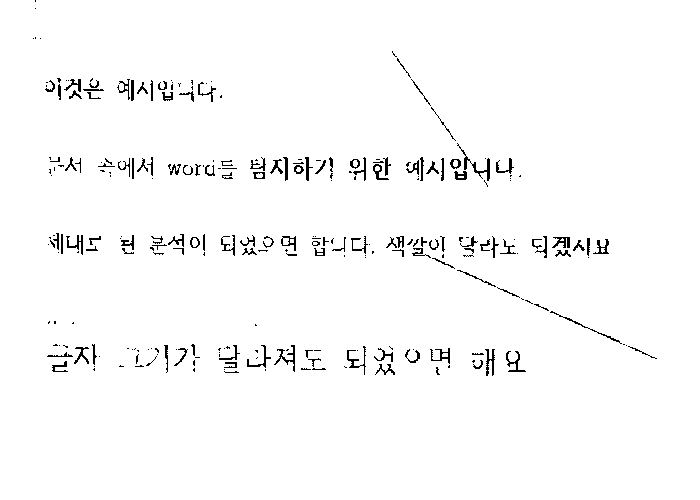

In [7]:
# edges=cv2.Canny(erode_img, 50, 150)
# cv2_imshow(edges)
minLineLength = 10
maxLineGap = 10

lines = cv2.HoughLinesP(erode_img,1,np.pi/180,80,minLineLength,maxLineGap)

if lines.all()!=None:
  for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(thres_img,(x1,y1),(x2,y2),(255,255,255),3)
cv2_imshow(thres_img)